In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('heart_disease_uci.csv')

df.head(8)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
5   6   56    Male  Cleveland  atypical angina     120.0  236.0  False   
6   7   62  Female  Cleveland     asymptomatic     140.0  268.0  False   
7   8   57  Female  Cleveland     asymptomatic     120.0  354.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
5          normal   178.0  False      0.8    upsloping  0.0   
6  lv hypertrophy   160.0  False      3.6  downsloping  2.0   
7          normal   163.0   True      0.6    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
5             normal    0  
6             normal    3  
7             normal    0

In [164]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [165]:
df.drop(('id'), axis=1, inplace=True) #Jer samo raste do broja redova
df.drop(('dataset'), axis=1, inplace=True) #Jer je nepotrebno
df.head(8)

age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   
5   56    Male  atypical angina     120.0  236.0  False          normal   
6   62  Female     asymptomatic     140.0  268.0  False  lv hypertrophy   
7   57  Female     asymptomatic     120.0  354.0  False          normal   

   thalch  exang  oldpeak        slope   ca               thal  num  
0   150.0  False      2.3  downsloping  0.0       fixed defect    0  
1   108.0   True      1.5         flat  3.0             normal    2  
2   129.0   True      2.6         flat  2.0  reversable defect    1  
3   187.0  False      3.5  downsloping  0.0             normal    0  
4   172.0  False      1.4    upsloping  0.0             normal    0  
5   178.0  False      0.8    upsloping  0.0             normal    0  
6   160.0  False      3.6  downsloping  2.0             normal    3  
7   163.0   True      0.6    upsloping  0.0             normal    0

In [166]:
feature_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainLevel',
    'trestbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalch': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'DepressionLevel',
    'slope': 'PeakExerciseCondition',
    'ca': 'NumberOfVesselsColored',
    'thal': 'ThalliumTestResult',
    'num': 'HeartFailureRisk - Target'
}
    
df = df.rename(columns=feature_mapping)
df.head()


Age     Sex   ChestPainLevel  RestingBloodPressure  Cholesterol  \
0   63    Male   typical angina                 145.0        233.0   
1   67    Male     asymptomatic                 160.0        286.0   
2   67    Male     asymptomatic                 120.0        229.0   
3   37    Male      non-anginal                 130.0        250.0   
4   41  Female  atypical angina                 130.0        204.0   

  FastingBloodSugar      RestingECG  MaxHeartRate ExerciseInducedAngina  \
0              True  lv hypertrophy         150.0                 False   
1             False  lv hypertrophy         108.0                  True   
2             False  lv hypertrophy         129.0                  True   
3             False          normal         187.0                 False   
4             False  lv hypertrophy         172.0                 False   

   DepressionLevel PeakExerciseCondition  NumberOfVesselsColored  \
0              2.3           downsloping                     0.0   
1              1.5                  flat                     3.0   
2              2.6                  flat                     2.0   
3              3.5           downsloping                     0.0   
4              1.4             upsloping                     0.0   

  ThalliumTestResult  HeartFailureRisk - Target  
0       fixed defect                          0  
1             normal                          2  
2  reversable defect                          1  
3             normal                          0  
4             normal                          0

In [167]:
#df['HeartFailureRisk - Target'] = df['HeartFailureRisk - Target'].replace([1, 2, 3, 4], 1)
#df.head(8)

In [168]:
df.isna().sum()

Age                            0
Sex                            0
ChestPainLevel                 0
RestingBloodPressure          59
Cholesterol                   30
FastingBloodSugar             90
RestingECG                     2
MaxHeartRate                  55
ExerciseInducedAngina         55
DepressionLevel               62
PeakExerciseCondition        309
NumberOfVesselsColored       611
ThalliumTestResult           486
HeartFailureRisk - Target      0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        920 non-null    int64  
 1   Sex                        920 non-null    object 
 2   ChestPainLevel             920 non-null    object 
 3   RestingBloodPressure       861 non-null    float64
 4   Cholesterol                890 non-null    float64
 5   FastingBloodSugar          830 non-null    object 
 6   RestingECG                 918 non-null    object 
 7   MaxHeartRate               865 non-null    float64
 8   ExerciseInducedAngina      865 non-null    object 
 9   DepressionLevel            858 non-null    float64
 10  PeakExerciseCondition      611 non-null    object 
 11  NumberOfVesselsColored     309 non-null    float64
 12  ThalliumTestResult         434 non-null    object 
 13  HeartFailureRisk - Target  920 non-null    int64  

In [170]:
df.describe()

Age  RestingBloodPressure  Cholesterol  MaxHeartRate  \
count  920.000000            861.000000   890.000000    865.000000   
mean    53.510870            132.132404   199.130337    137.545665   
std      9.424685             19.066070   110.780810     25.926276   
min     28.000000              0.000000     0.000000     60.000000   
25%     47.000000            120.000000   175.000000    120.000000   
50%     54.000000            130.000000   223.000000    140.000000   
75%     60.000000            140.000000   268.000000    157.000000   
max     77.000000            200.000000   603.000000    202.000000   

       DepressionLevel  NumberOfVesselsColored  HeartFailureRisk - Target  
count       858.000000              309.000000                 920.000000  
mean          0.878788                0.676375                   0.995652  
std           1.091226                0.935653                   1.142693  
min          -2.600000                0.000000                   0.000000  
25%           0.000000                0.000000                   0.000000  
50%           0.500000                0.000000                   1.000000  
75%           1.500000                1.000000                   2.000000  
max           6.200000                3.000000                   4.000000

In [171]:
import pandas as pd

# Fill missing numerical columns with mean/median
df['RestingBloodPressure'].fillna(df['RestingBloodPressure'].mean(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['MaxHeartRate'].fillna(df['MaxHeartRate'].median(), inplace=True)
df['DepressionLevel'].fillna(df['DepressionLevel'].mean(), inplace=True)

# Fill missing categorical columns with mode
df['FastingBloodSugar'].fillna(df['FastingBloodSugar'].mode()[0], inplace=True)
df['RestingECG'].fillna(df['RestingECG'].mode()[0], inplace=True)
df['ExerciseInducedAngina'].fillna(df['ExerciseInducedAngina'].mode()[0], inplace=True)
df['PeakExerciseCondition'].fillna(df['PeakExerciseCondition'].mode()[0], inplace=True)
df['ThalliumTestResult'].fillna(df['ThalliumTestResult'].mode()[0], inplace=True)

# Drop the 'NumberOfVesselsColored' column as it is no longer needed
df.drop(columns=['NumberOfVesselsColored'], inplace=True)

print(df.isnull().sum())


Age                          0
Sex                          0
ChestPainLevel               0
RestingBloodPressure         0
Cholesterol                  0
FastingBloodSugar            0
RestingECG                   0
MaxHeartRate                 0
ExerciseInducedAngina        0
DepressionLevel              0
PeakExerciseCondition        0
ThalliumTestResult           0
HeartFailureRisk - Target    0
dtype: int64


In [172]:
df.head(8)

Age     Sex   ChestPainLevel  RestingBloodPressure  Cholesterol  \
0   63    Male   typical angina                 145.0        233.0   
1   67    Male     asymptomatic                 160.0        286.0   
2   67    Male     asymptomatic                 120.0        229.0   
3   37    Male      non-anginal                 130.0        250.0   
4   41  Female  atypical angina                 130.0        204.0   
5   56    Male  atypical angina                 120.0        236.0   
6   62  Female     asymptomatic                 140.0        268.0   
7   57  Female     asymptomatic                 120.0        354.0   

   FastingBloodSugar      RestingECG  MaxHeartRate  ExerciseInducedAngina  \
0               True  lv hypertrophy         150.0                  False   
1              False  lv hypertrophy         108.0                   True   
2              False  lv hypertrophy         129.0                   True   
3              False          normal         187.0                  False   
4              False  lv hypertrophy         172.0                  False   
5              False          normal         178.0                  False   
6              False  lv hypertrophy         160.0                  False   
7              False          normal         163.0                   True   

   DepressionLevel PeakExerciseCondition ThalliumTestResult  \
0              2.3           downsloping       fixed defect   
1              1.5                  flat             normal   
2              2.6                  flat  reversable defect   
3              3.5           downsloping             normal   
4              1.4             upsloping             normal   
5              0.8             upsloping             normal   
6              3.6           downsloping             normal   
7              0.6             upsloping             normal   

   HeartFailureRisk - Target  
0                          0  
1                          2  
2                          1  
3                          0  
4                          0  
5                          0  
6                          3  
7                          0

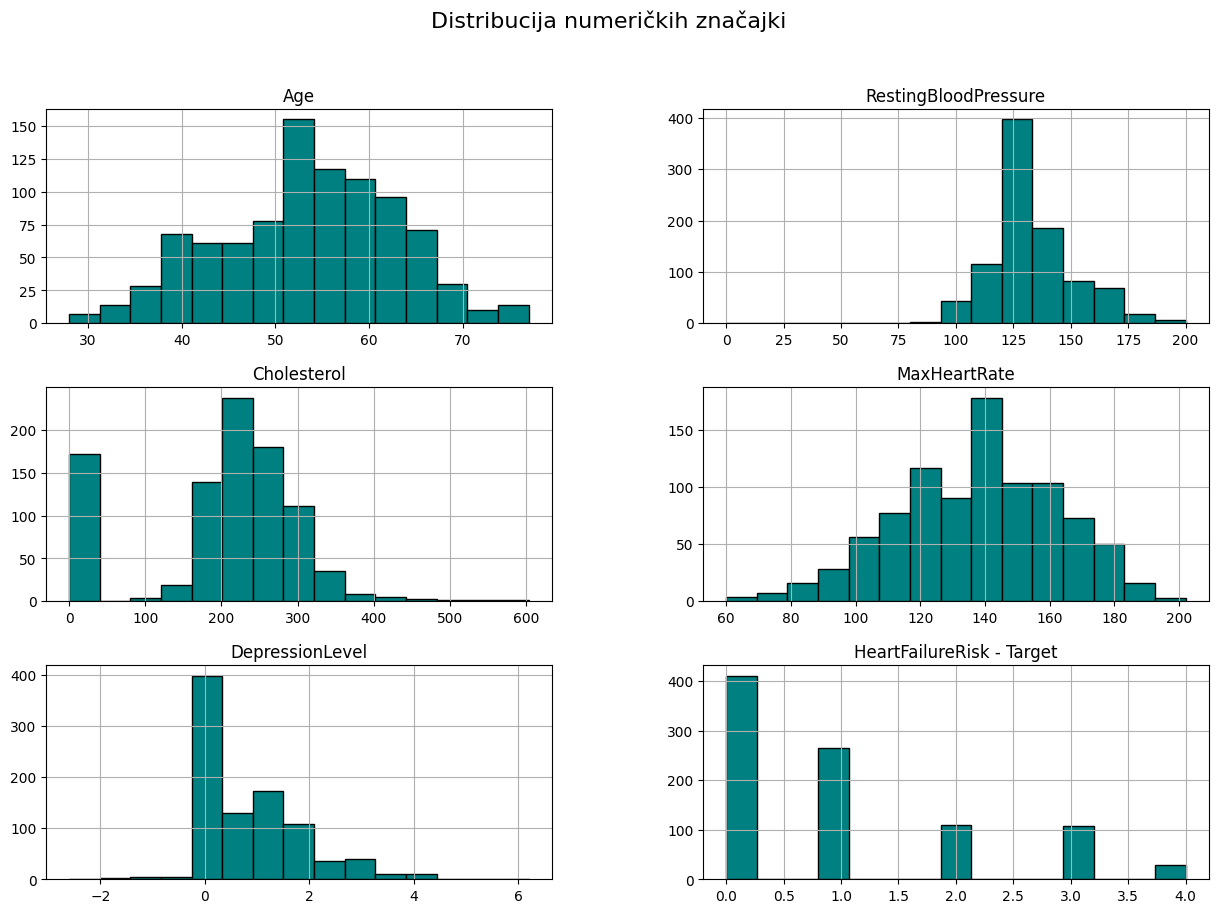

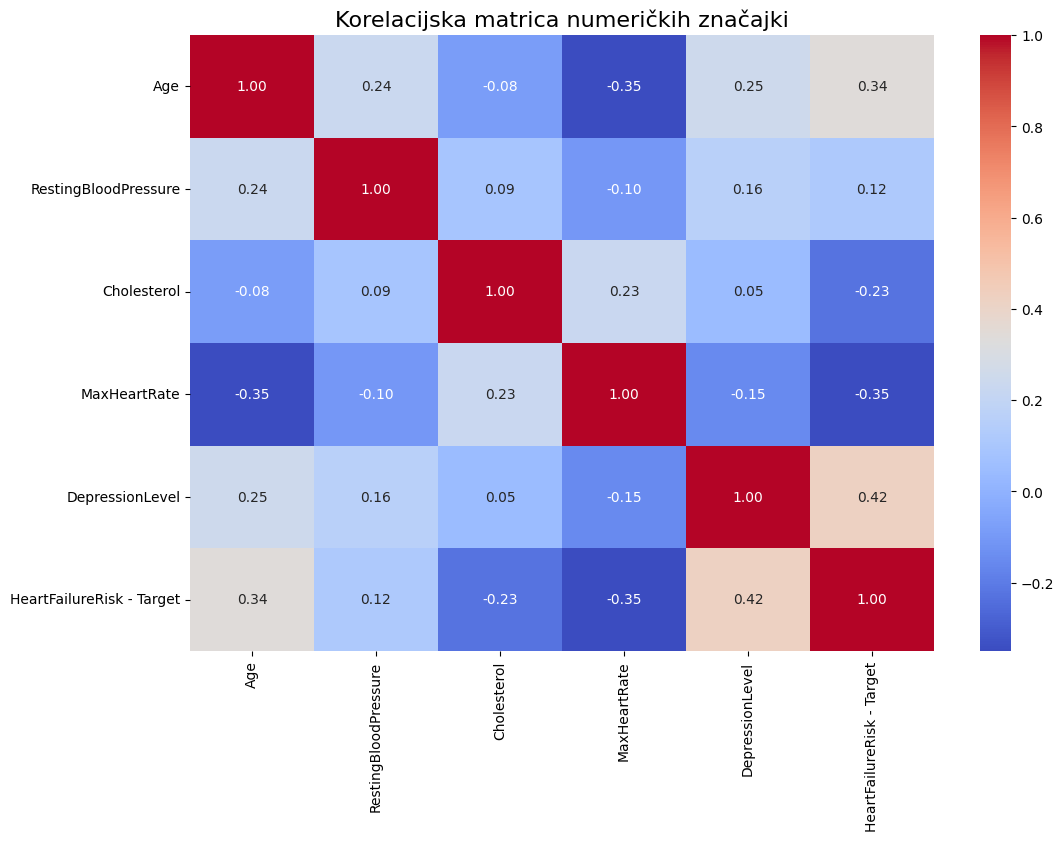

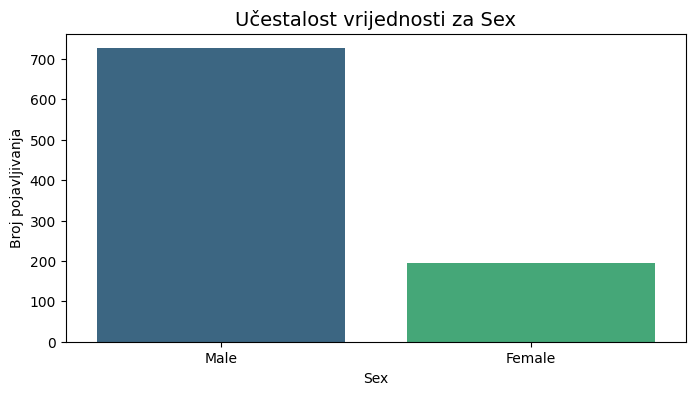

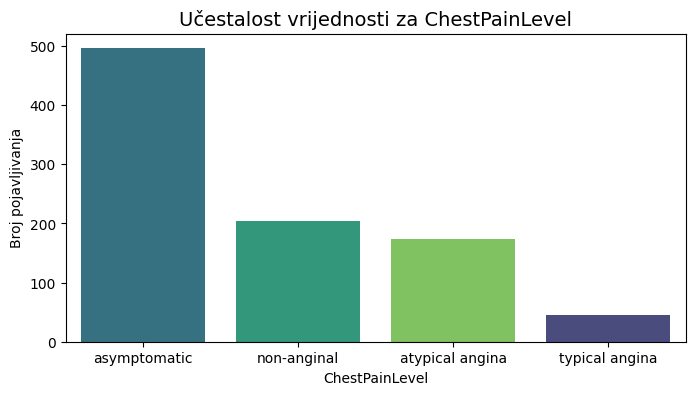

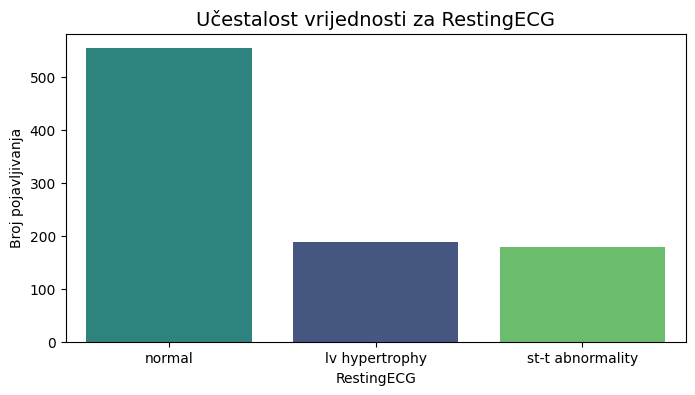

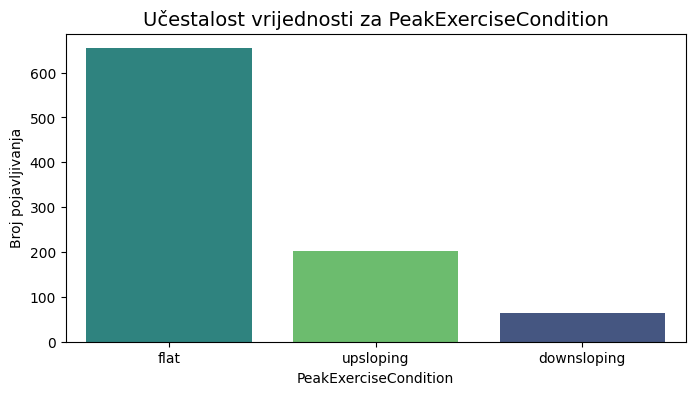

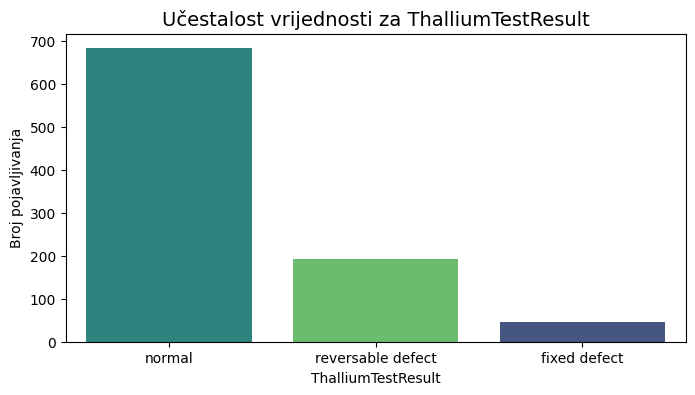

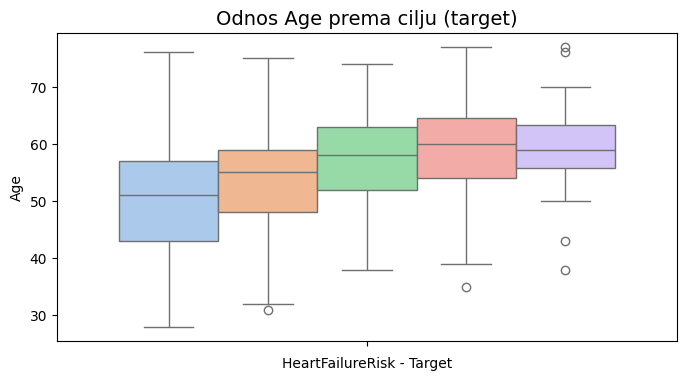

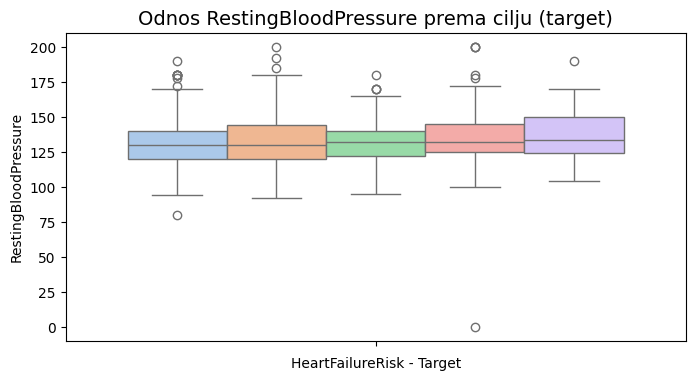

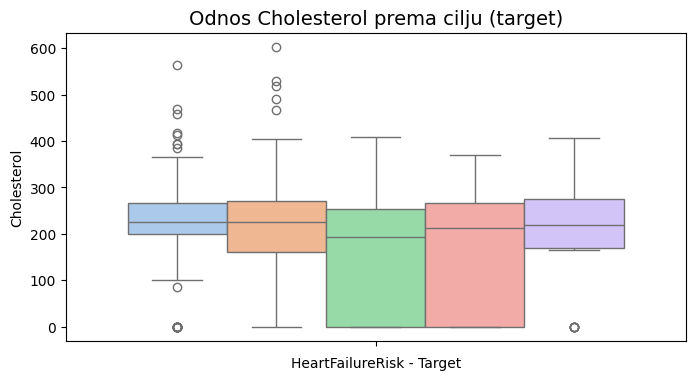

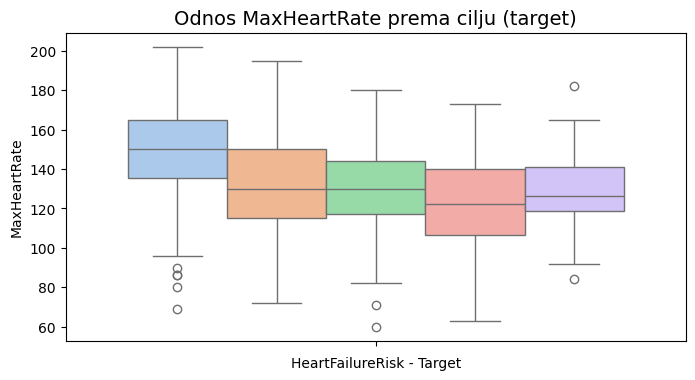

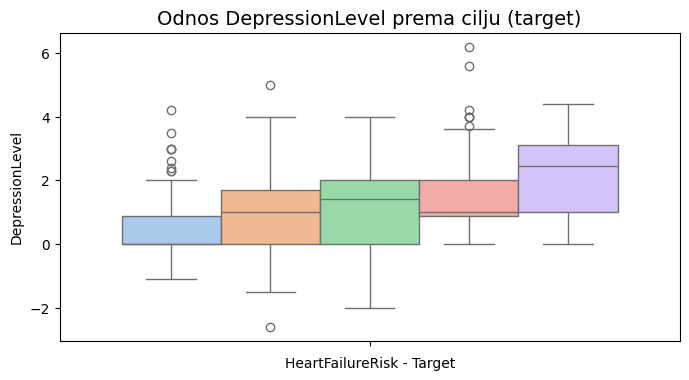

In [173]:
import seaborn as sns

# 1. Distribucija numeričkih značajki
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Distribucija numeričkih značajki", fontsize=16)
plt.show()

# 2. Korelacijska matrica
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacijska matrica numeričkih značajki", fontsize=16)
plt.show()

# 3. Učestalost kategoričkih značajki
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False, order=df[col].value_counts().index)
    plt.title(f"Učestalost vrijednosti za {col}", fontsize=14)
    plt.ylabel("Broj pojavljivanja")
    plt.xlabel(col)
    plt.show()

# 4. Odnos numeričkih značajki prema ciljnoj vrijednosti
for col in numeric_cols:
    if col != 'HeartFailureRisk - Target':
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, y=col, hue='HeartFailureRisk - Target', palette='pastel', legend=False)
        plt.title(f"Odnos {col} prema cilju (HeartFailureRisk - Target)", fontsize=14)
        plt.xlabel("HeartFailureRisk - Target")
        plt.ylabel(col)
        plt.show()


In [174]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Sex', 'ChestPainLevel', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'PeakExerciseCondition', 'ThalliumTestResult']:
    df[col] = le.fit_transform(df[col])

print(df.dtypes)


Age                            int64
Sex                            int32
ChestPainLevel                 int32
RestingBloodPressure         float64
Cholesterol                  float64
FastingBloodSugar              int64
RestingECG                     int32
MaxHeartRate                 float64
ExerciseInducedAngina          int64
DepressionLevel              float64
PeakExerciseCondition          int32
ThalliumTestResult             int32
HeartFailureRisk - Target      int64
dtype: object


In [175]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [176]:
df.head(8)

Age  Sex  ChestPainLevel  RestingBloodPressure  Cholesterol  \
0  1.007386    1               3              0.698041     0.311021   
1  1.432034    1               0              1.511761     0.797713   
2  1.432034    1               0             -0.658158     0.274289   
3 -1.752828    1               2             -0.115679     0.467130   
4 -1.328180    0               1             -0.115679     0.044717   
5  0.264251    1               1             -0.658158     0.338569   
6  0.901224    0               0              0.426801     0.632421   
7  0.370413    0               0             -0.658158     1.422148   

   FastingBloodSugar  RestingECG  MaxHeartRate  ExerciseInducedAngina  \
0           2.380476           0      0.489727              -0.760292   
1          -0.420084           0     -1.181478               1.315283   
2          -0.420084           0     -0.345875               1.315283   
3          -0.420084           1      1.961979              -0.760292   
4          -0.420084           0      1.365120              -0.760292   
5          -0.420084           1      1.603864              -0.760292   
6          -0.420084           0      0.887633              -0.760292   
7          -0.420084           1      1.007005               1.315283   

   DepressionLevel  PeakExerciseCondition  ThalliumTestResult  \
0         1.349421                      0                   0   
1         0.589832                      1                   1   
2         1.634267                      1                   2   
3         2.488805                      0                   1   
4         0.494884                      2                   1   
5        -0.074808                      2                   1   
6         2.583754                      0                   1   
7        -0.264705                      2                   1   

   HeartFailureRisk - Target  
0                  -0.871794  
1                   0.879408  
2                   0.003807  
3                  -0.871794  
4                  -0.871794  
5                  -0.871794  
6                   1.755010  
7                  -0.871794